In [22]:
#installation of necessary libraries, if these were not present before
pip install tensorflow
pip install tensorflow-addons

Note: you may need to restart the kernel to use updated packages.


In [8]:
#importing necessary libraries, pip version of tensorflow is used for this code, conda installation could act different

import tensorflow as tf
import pandas as pd
from datetime import datetime
import numpy as np
import tensorflow.keras as  keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
import IPython
import random
import matplotlib.pyplot as plt
import copy
import h5py    
import pickle
 


In [2]:
#
data = open("data.pkl",'rb')
data = pickle.load(data,encoding='bytes')
lijst = copy.copy(data)
voc_List = lijst.pop("Bron")


for naam in voc_List:
  vocabulair = voc_List.unique()



Y= data.pop("Bron")
print(Y)
"""
use one-hot encoded vector for output, should be expanded for more radionuclides
0 represents background radiation
1 represents Cs-137
vertaling = Dutch for Translation

"""
vertaling = pd.DataFrame({ "0" :[],"1" :[]})



for i in range(0,len(Y)):
  a = np.where(vocabulair == Y[i])
  a = int(a[0])
  if(a == 1):
    Cs = 1
    Bg = 0
  else:
    Cs = 0
    Bg = 1
  vertaling = vertaling.append({
      "0": Bg,
      "1": Cs
  }, ignore_index = True)


vertaling = np.array(vertaling)
Peak_Y = data.pop('Peak')
Peak_Y = np.array(Peak_Y)
Peak_Y = Peak_Y.tolist()



Z = data.pop("Counts")
X= data.pop("Energie")

Y2 = data.pop("Activiteit")
Y2 = Y2.tolist()
for i in range (0, len(Y2)):
  a = Y2[i]
  a = a/1000
  Y2[i]= a


Y2 = np.array(Y2)

spectrum = pd.DataFrame()
energie = []
counts = []
n =random.randint(0,len(X))
spect = [500,1100,2650,3365,4000,5500 ]
labels_spect = ['Background Bunker','Background HOB', 'Background ENE', 'Cs-137 ENE', 'Cs-137 Bunker', 'Cs-137 HOB' ]
for i in range(0, len(X)):
    a = X[i]
    b = Z[i]
    a = np.array(a)
    b = np.array(b)   
    energie.append(a)
    counts.append(b)

spectrum['Counts'] = counts
spectrum['Energie']= energie
spectrum = spectrum.to_numpy()
spectrum = spectrum.tolist()

counts = np.array(counts)
energie = np.array(energie)
x_train, x_test, y_train, y_test = train_test_split(spectrum,vertaling, test_size=0.1, random_state = 42)



x_test_spect = x_test.copy()


x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)

x2_train,x2_test,y2_train,y2_test = train_test_split(data,Peak_Y, test_size = 0.1, random_state=42)

y2_train = tf.convert_to_tensor(y2_train)
y2_test = tf.convert_to_tensor(y2_test)



0       Background
1       Background
2       Background
3       Background
4       Background
           ...    
6495         Cs137
6496         Cs137
6497         Cs137
6498         Cs137
6499         Cs137
Name: Bron, Length: 6500, dtype: object


'\ndata_val = validatie\nY_val= data_val.pop("Bron")\nY2_val = data_val.pop("Activiteit")\nY2_val = Y2_val/1000\n\n\n\n\n\nvertaal = pd.DataFrame({\n    "0" :[],\n    "1" :[]\n})\n\n\n\nfor i in range(val_percent,val_percent + len(Y_val)):\n  a = np.where(vocabulair == Y_val[i])\n  a = int(a[0])\n  if(a == 1):\n    Cs = 1\n    Bg = 0\n  else:\n    Cs = 0\n    Bg = 1\n  vertaal = vertaal.append({\n      "0": Bg,\n      "1": Cs\n  }, ignore_index = True)\n\n\ny_val = tf.convert_to_tensor(vertaal)\n\n\nZ_val = data_val.pop("Counts")\nX_val= data_val.pop("Energie")\n\n\nspectrum = pd.DataFrame()\nenergie = []\ncounts = []\nfor i in range(val_percent,val_percent + len(X_val)):\n  a = X_val[i]\n  b = Z_val[i]\n  a = np.array(a)\n\n  b = np.array(b)\n\n  energie.append(a)\n  counts.append(b)\n\nn = 50\n\n  \nspectrum[\'Counts\'] = counts\nspectrum[\'Energie\']= energie\nspectrum = spectrum.to_numpy()\nspectrum = spectrum.tolist()\nx_val = tf.convert_to_tensor(spectrum)\nx2_val = data_val\n\n\

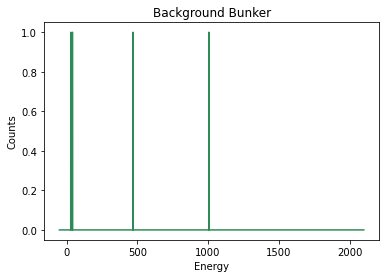

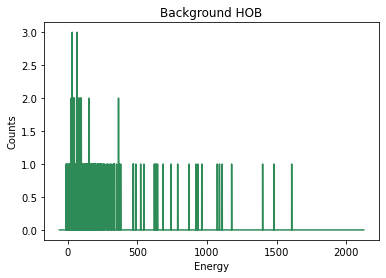

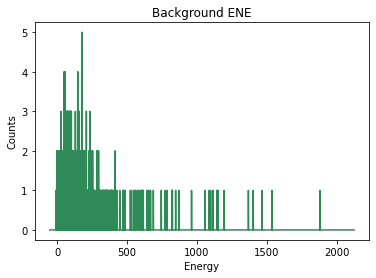

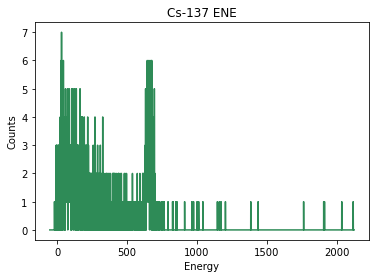

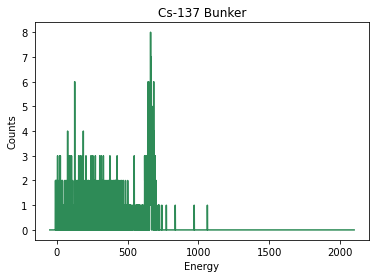

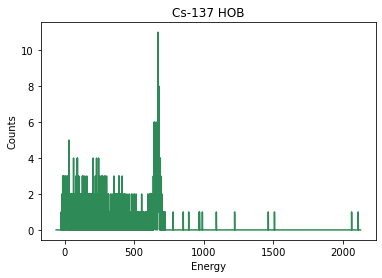

In [3]:
#plot some spectra to have a general idea of the spectra
for spe in spect:
        
        rand = spe
        labeler = spect.index(rand)
        plt.plot(X[rand],Z[rand], color = 'seagreen')
        plt.ylabel('Counts')
        plt.xlabel('Energy')
        plt.title(labels_spect[labeler])
        plt.show()



In [15]:

# Clear any logs from previous runs
!rm -rf ./logs/ 


# function for making the model, hyperparameters are extracted from a Bayesian Optimization with Keras-Tuner, example of this can be found on https://keras.io/keras_tuner/
def build_model():
    
    
    hp1 = 35
    hp10 = 194
    hp11 = 190
    hp12 = 70
    hp13 = 192
    hp14 = 224
    hp15 = 164
    hp16 = 122
    ps = 1
    

    input1 = keras.Input(shape =(2,4096), name = "Counts")
    x1 = tf.keras.layers.Convolution1D(hp1,1, strides = 1,padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001),name = 'block1_conv1')(input1)
    x1 = tf.keras.layers.Convolution1D(hp1,1, strides = 1,padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001),name = 'block1_conv2')(x1) 
    x1 = tf.keras.layers.Convolution1D(hp1,1, strides = 1,padding = 'same', activation = 'relu', kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block1_conv3')(x1) 
    x1 = tf.keras.layers.MaxPooling1D(pool_size = ps, strides = 1, padding = 'same', name = 'Pooling1')(x1)

    x2 = tf.keras.layers.concatenate([x1,input1])
    x2 = tf.keras.layers.BatchNormalization()(x2)
    x2 = tf.keras.layers.Convolution1D(hp1,1 , padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block2_conv1')(x2)
    x2 = tf.keras.layers.Convolution1D(hp1,1 , padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block2_conv2')(x2)
    x2 = tf.keras.layers.Convolution1D(hp1,1 , padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block2_conv3')(x2)
    x2 = tf.keras.layers.MaxPooling1D(pool_size = ps, strides = 1, padding = 'same', name = 'Pooling2')(x2)
    
    x3 = tf.keras.layers.concatenate([input1,x1,x2])
    x3 = tf.keras.layers.BatchNormalization()(x3)
    x3 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block3_conv1')(x3)
    x3 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block3_conv2')(x3)
    x3 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block3_conv3')(x3)
    x3 = tf.keras.layers.MaxPooling1D(pool_size = ps, strides = 1, padding = 'same', name = 'Pooling3')(x3)
    
    x4 = tf.keras.layers.concatenate([input1,x1,x2,x3])
    x4 = tf.keras.layers.BatchNormalization()(x4)
    x4 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same',activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block4_conv1')(x4)
    x4 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block4_conv2')(x4)
    x4 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block4_conv3')(x4)
    x4 = tf.keras.layers.MaxPooling1D(pool_size = ps, strides = 1, padding = 'same', name = 'Pooling4')(x4)
    
    x5 = tf.keras.layers.concatenate([input1,x1,x2,x3,x4])
    x5 = tf.keras.layers.BatchNormalization()(x5)
    x5 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block5_conv1')(x5)
    x5 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block5_conv2')(x5)
    x5 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block5_conv3')(x5)
    x5 = tf.keras.layers.MaxPooling1D(pool_size = ps, strides = 1, padding = 'same', name = 'Pooling5')(x5)
     
    x6 = tf.keras.layers.concatenate([input1,x1,x2,x3,x4,x5])
    x6 = tf.keras.layers.BatchNormalization()(x6)
    x6 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block6_conv1')(x6)
    x6 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block6_conv2')(x6)
    x6 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block6_conv3')(x6)
    x6 = tf.keras.layers.MaxPooling1D(pool_size = ps, strides = 1, padding = 'same', name = 'Pooling6')(x6)
    
    x7= tf.keras.layers.concatenate([input1,x1,x2,x3,x4,x5,x6])
    x7 = tf.keras.layers.BatchNormalization()(x7)
    x7 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block7_conv1')(x7)
    x7 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block7_conv2')(x7)
    x7 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block7_conv3')(x7)
    x7 = tf.keras.layers.MaxPooling1D(pool_size = ps, strides = 1, padding = 'same', name = 'Pooling7')(x7)
    
    x8= tf.keras.layers.concatenate([input1,x1,x2,x3,x4,x5,x6,x7])
    x8 = tf.keras.layers.BatchNormalization()(x8)
    x8 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same',activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block8_conv1')(x8)
    x8 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block8_conv2')(x8) 
    x8 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block8_conv3')(x8) 
    x8 = tf.keras.layers.MaxPooling1D(pool_size = ps, strides = 1, padding = 'same', name = 'Pooling8')(x8)
    
    x9= tf.keras.layers.concatenate([input1,x1,x2,x3,x4,x5,x6,x7,x8])
    x9 = tf.keras.layers.BatchNormalization()(x9)
    x9 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block9_conv1')(x9)
    x9 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block9_conv2')(x9)
    x9 = tf.keras.layers.Convolution1D(hp1,1,padding = 'same', activation = 'relu',kernel_regularizer = tf.keras.regularizers.L1L2(l1=0.001, l2=0.001), name = 'block9_conv3')(x9)
    x9 = tf.keras.layers.MaxPooling1D(pool_size = ps, strides = 1, padding = 'same', name = 'Pooling9')(x9)
    
    conc = tf.keras.layers.concatenate([x1,x2,x3,x4,x5,x6,x7,x8,x9])
    conc = tf.keras.layers.MaxPooling1D(pool_size = 1, strides = 4, name = 'MaxPool')(conc)
    x = tf.keras.layers.Flatten()(conc) 
    #output for the peak identification => 4096 channels which correspond with the channels of the original spectrum.
    output2 = tf.keras.layers.Dense(4096, activation = 'swish', name = 'Peak')(x)

    
    x = tf.keras.layers.Dense(hp10, activation = 'relu', name = 'Dense1')(x)
    x = tf.keras.layers.Dense(hp11, activation = 'relu', name = 'Dense2')(x)
    x = tf.keras.layers.Dense(hp12, activation = 'relu', name = 'Dense3')(x)
    x = tf.keras.layers.Dense(hp13, activation = 'relu', name = 'Dense4')(x)
    x = tf.keras.layers.Dense(hp14, activation = 'relu', name = 'Dense5')(x)
    x = tf.keras.layers.Dense(hp15, activation = 'relu', name = 'Dense6')(x)
    x = tf.keras.layers.Dense(hp16, activation = 'relu', name = 'Dense7')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    output1 = tf.keras.layers.Dense(2, activation = 'softmax', name = 'Bron')(x)
   

    #define outputs of the neural network and the inputs
    model = keras.Model(inputs = (input1), outputs=(output1, output2))
    
    losses = {
        'Bron' : tf.keras.losses.CategoricalCrossentropy(from_logits = True),
        'Peak' : tf.keras.losses.MeanAbsoluteError()
    }
    
    Metrics = {
        'Bron' : ['accuracy',tfa.metrics.F1Score(num_classes = 2, threshold = 0.5)],
        'Peak': [tf.keras.metrics.BinaryAccuracy()]
        
    }
    
    model.compile(loss=losses,
                  optimizer=keras.optimizers.Adam(),
                  metrics= Metrics )
  
  
    return model

# Data opslaan om te visualiseren met tensorboard

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq = 1, write_images = True)

model1 = build_model()

model1.summary()




'rm' is not recognized as an internal or external command,
operable program or batch file.


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Counts (InputLayer)             [(None, 2, 4096)]    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv1D)           (None, 2, 35)        143395      Counts[0][0]                     
__________________________________________________________________________________________________
block1_conv2 (Conv1D)           (None, 2, 35)        1260        block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv3 (Conv1D)           (None, 2, 35)        1260        block1_conv2[0][0]               
_______________________________________________________________________________________

In [9]:
model1 = keras.models.load_model('identification_model.h5')

AttributeError: 'str' object has no attribute 'decode'

In [16]:
#choose number of epochs and batchsize
NUM_EPOCHS = 16
BATCH_SIZE = 64
history1 = model1.fit(x_train, (y_train,y2_train), batch_size = BATCH_SIZE, epochs =NUM_EPOCHS, verbose = 1, validation_data = (x_test,(y_test,y2_test)))


#model1.save('identification_model.h5')


Epoch 1/16
92/92 [==============================] - 11s 121ms/step - loss: 8.0293 - Bron_loss: 0.4778 - Peak_loss: 0.0425 - Bron_accuracy: 0.8190 - Bron_f1_score: 0.8076 - Peak_binary_accuracy: 0.9845 - val_loss: 2.8535 - val_Bron_loss: 0.3702 - val_Peak_loss: 0.0249 - val_Bron_accuracy: 0.9400 - val_Bron_f1_score: 0.9374 - val_Peak_binary_accuracy: 0.9888
Epoch 2/16
92/92 [==============================] - 10s 111ms/step - loss: 2.1625 - Bron_loss: 0.3637 - Peak_loss: 0.0216 - Bron_accuracy: 0.9489 - Bron_f1_score: 0.9462 - Peak_binary_accuracy: 0.9881 - val_loss: 1.6626 - val_Bron_loss: 0.4313 - val_Peak_loss: 0.0162 - val_Bron_accuracy: 0.8738 - val_Bron_f1_score: 0.8575 - val_Peak_binary_accuracy: 0.9888
Epoch 3/16
92/92 [==============================] - 10s 112ms/step - loss: 1.2246 - Bron_loss: 0.3506 - Peak_loss: 0.0152 - Bron_accuracy: 0.9603 - Bron_f1_score: 0.9582 - Peak_binary_accuracy: 0.9881 - val_loss: 0.9275 - val_Bron_loss: 0.3524 - val_Peak_loss: 0.0129 - val_Bron_acc

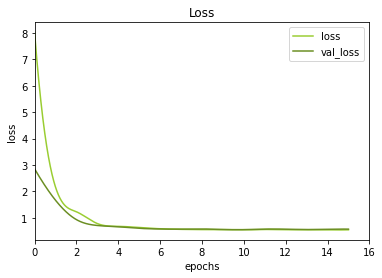

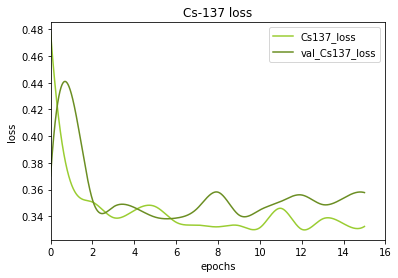

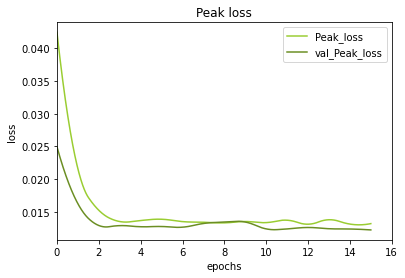

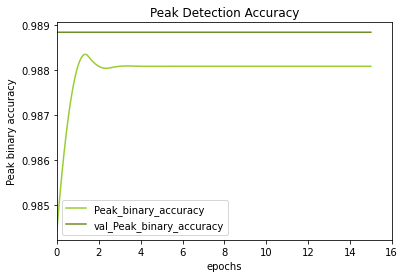

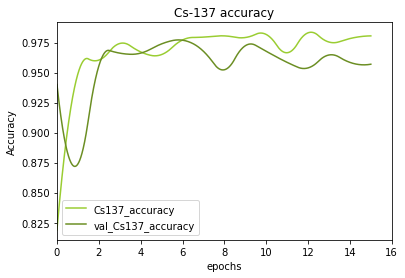

In [17]:
#plot learning curves -- important to note, these are made with a spline to make them more visually pleasing
from scipy.interpolate import  make_interp_spline

val_bron_f1 = history1.history['val_Bron_f1_score']
bron_f1 = history1.history['Bron_f1_score']
for i in range(0, len(bron_f1)):
    values_val = val_bron_f1[i]
    values = bron_f1[i]
    value_val = np.average(values_val)
    value = np.average(values)
    val_bron_f1[i] = value_val
    bron_f1[i] = value


x = np.arange(0,len(bron_f1), 1)
xnew = np.arange(0,len(bron_f1)-1,0.0001)
length = NUM_EPOCHS




loss = make_interp_spline(x,history1.history['loss'],k=3)
Loss = loss(xnew)
val_loss = make_interp_spline(x,history1.history['val_loss'], k=3)
Val_loss = val_loss(xnew)
plt.title('Loss')
plt.plot(xnew, Loss, color = 'yellowgreen')
plt.plot(xnew,Val_loss, color = 'olivedrab')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(('loss', 'val_loss'))
plt.xlim([0,length])
plt.show()

bron_loss = make_interp_spline(x,history1.history['Bron_loss'],k=3)
Bron_loss = bron_loss(xnew)
bron_val_loss = make_interp_spline(x,history1.history['val_Bron_loss'], k=3)
Bron_val_loss = bron_val_loss(xnew)
plt.title('Cs-137 loss')
plt.plot(xnew, Bron_loss, color = 'yellowgreen', label = 'Cs137_loss')
plt.plot(xnew, Bron_val_loss, color = 'olivedrab', label = 'val_Cs137_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.xlim([0,length])
plt.show()

p_l = make_interp_spline(x,history1.history['Peak_loss'] , k = 2)
P_l = p_l(xnew)
v_p_l= make_interp_spline(x,history1.history['val_Peak_loss'] , k = 2)
V_p_l = v_p_l(xnew)

plt.plot(xnew,P_l, color = 'yellowgreen', label = 'Peak_loss')
plt.plot(xnew, V_p_l, color = 'olivedrab', label = 'val_Peak_loss')
plt.title('Peak loss')
plt.xlim([0,length])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

br_f1 = make_interp_spline(x, bron_f1, k = 2) 
bron_f1 = br_f1(xnew)
val_br_f1 = make_interp_spline(x, val_bron_f1, k = 2)
val_bron_f1 = val_br_f1(xnew)
plt.plot(xnew,bron_f1, color = 'yellowgreen', label ='Bron_f1_score')
plt.plot(xnew,val_bron_f1, color = 'olivedrab', label = 'val_Bron_f1_score')
plt.xlim([0,length])
plt.title('Cs-137 F1-score')
plt.xlabel('epochs')
plt.ylabel('F1-score')
plt.legend()
plt.show()

peak_acc = make_interp_spline(x,history1.history['Peak_binary_accuracy'], k=2 )
Peak_acc = peak_acc(xnew)
val_peak_acc = make_interp_spline(x,history1.history['val_Peak_binary_accuracy'], k=2 )
Val_peak_acc = val_peak_acc(xnew)
plt.plot(xnew, Peak_acc, color = 'yellowgreen', label ='Peak_binary_accuracy' )
plt.plot(xnew, Val_peak_acc, color = 'olivedrab', label = 'val_Peak_binary_accuracy')
plt.title('Peak Detection Accuracy')
plt.ylabel('Peak binary accuracy')
plt.xlabel('epochs')
plt.legend()
plt.xlim([0,length])

plt.show()
b_a = make_interp_spline(x,history1.history['Bron_accuracy'] , k = 2)
B_a = b_a(xnew)

v_b_a = make_interp_spline(x,history1.history['val_Bron_accuracy'] , k = 2)
V_b_a = v_b_a(xnew)
plt.plot(xnew, B_a, color = 'yellowgreen', label = 'Cs137_accuracy')
plt.plot(xnew,V_b_a, color= 'olivedrab', label = 'val_Cs137_accuracy')
plt.title('Cs-137 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.xlim([0,length])
plt.legend()


plt.show()


In [8]:
(model1.evaluate((x_test),(y_test, y2_test), batch_size = 1))

650/650 [==============================] - 3s 5ms/step - loss: 0.5913 - Bron_loss: 0.3694 - Peak_loss: 0.0133 - Bron_accuracy: 0.9415 - Bron_f1_score: 0.9378 - Peak_binary_accuracy: 0.9888


[0.5912598967552185,
 0.36937516927719116,
 0.013312181457877159,
 0.9415384531021118,
 array([0.922449  , 0.95308644], dtype=float32),
 0.9888408780097961]

                0         1
0    0.000000e+00  1.000000
1    0.000000e+00  1.000000
2    1.181700e-08  1.000000
3    0.000000e+00  1.000000
4    0.000000e+00  1.000000
..            ...       ...
645  0.000000e+00  1.000000
646  9.999843e-01  0.000016
647  0.000000e+00  1.000000
648  0.000000e+00  1.000000
649  9.999739e-01  0.000026

[650 rows x 2 columns]
       0    1
0    0.0  1.0
1    0.0  1.0
2    1.0  0.0
3    0.0  1.0
4    0.0  1.0
..   ...  ...
645  0.0  1.0
646  1.0  0.0
647  0.0  1.0
648  0.0  1.0
649  1.0  0.0

[650 rows x 2 columns]


<ipython-input-18-7015f812c1e5>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,(ax,ax3) = plt.subplots(1,2,gridspec_kw={'width_ratios': [4, 1]}, figsize = (10,5))


"\n    if(a.iloc[i,0]!=np.round(b.iloc[i,0])):\n        FOUTenergie.append(e[i])\n        FOUTcounts.append(c[i])\n        FOUT.append(b.iloc[i,1])\n        plt.figure(i+1)\n        plt.plot(e[i],c[i], color = 'seagreen')\n        plt.xlabel('Energy')\n        plt.ylabel('Counts')\n        plt.ylim(0,10)\n        if(np.round(b.iloc[i,0] )== 1):\n            plt.title('False negative' )\n        else:\n            plt.title('False positive')\n"

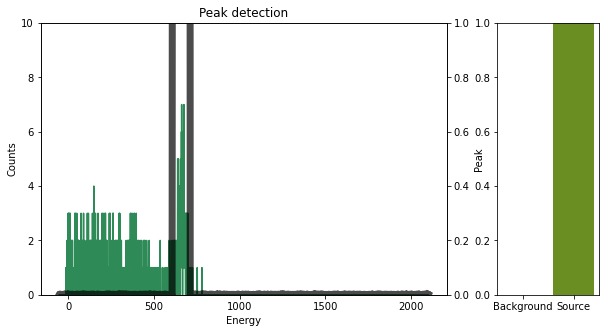

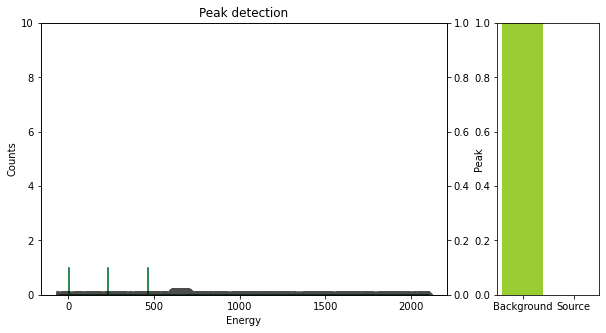

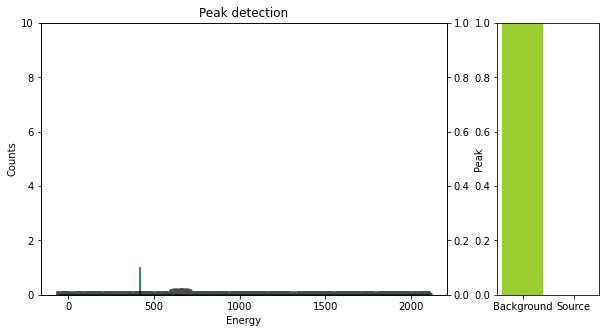

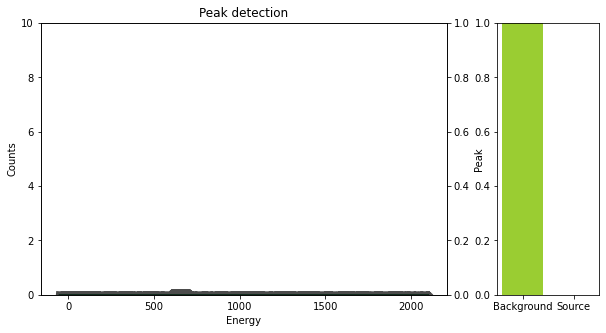

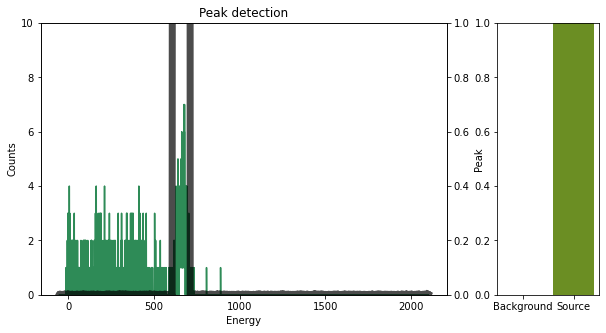

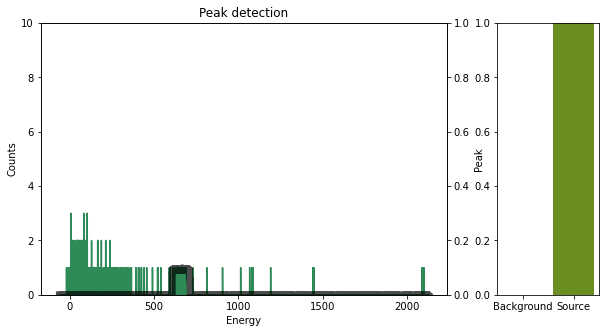

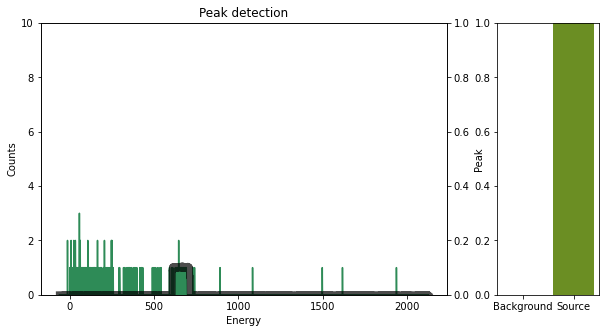

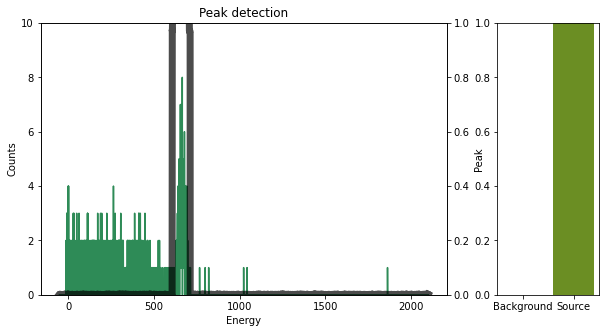

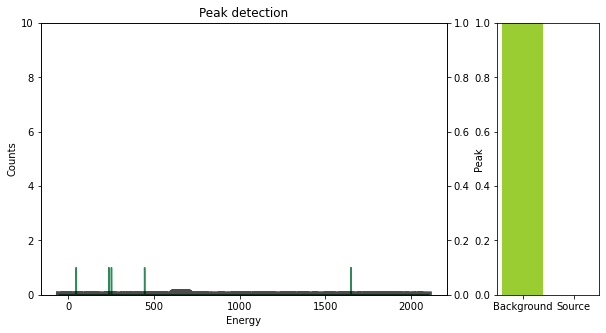

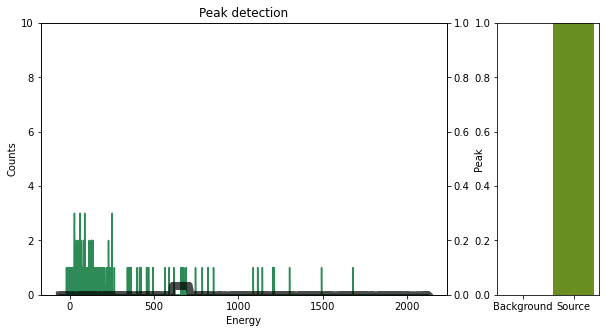

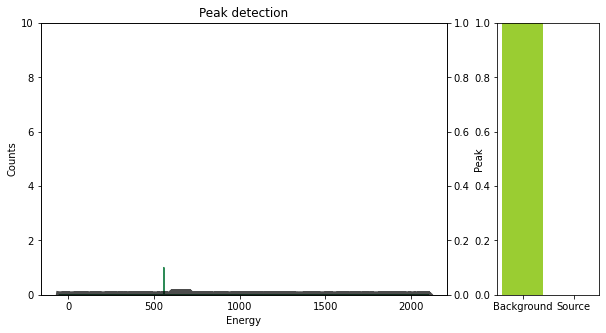

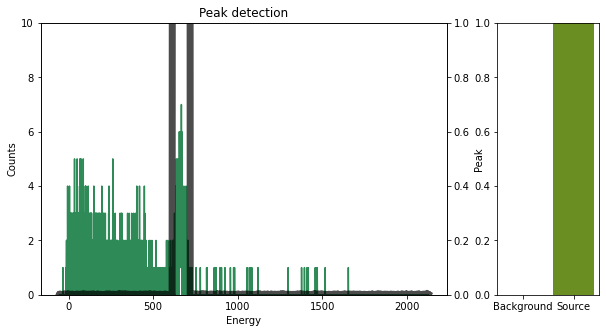

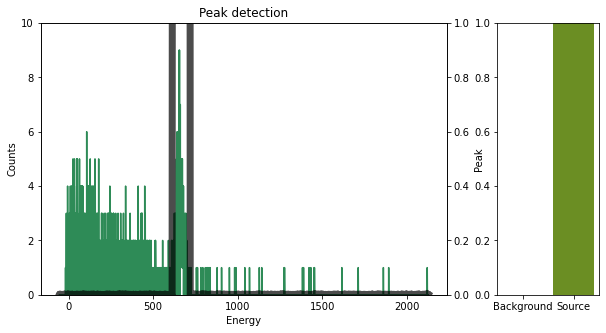

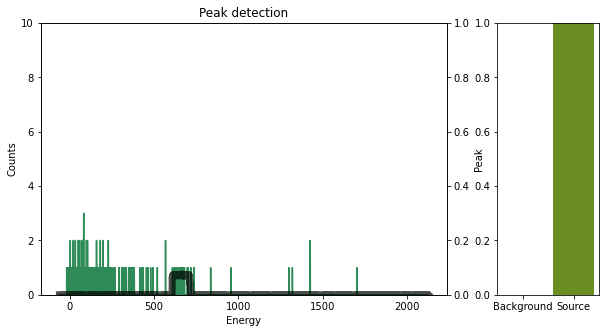

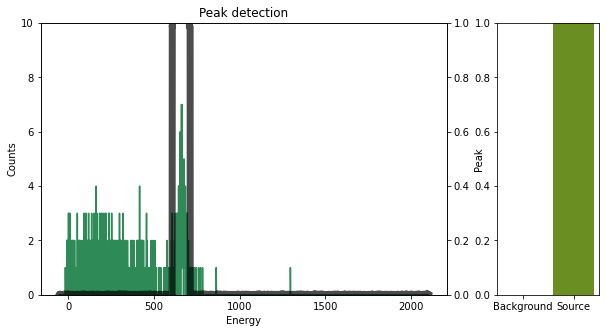

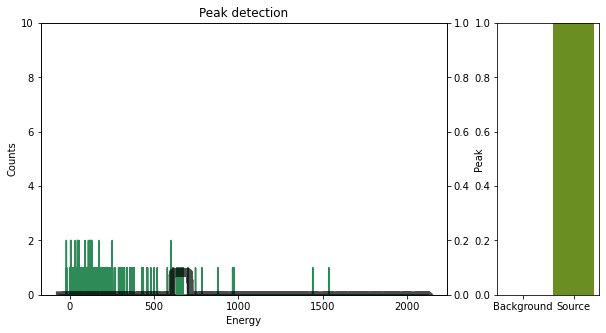

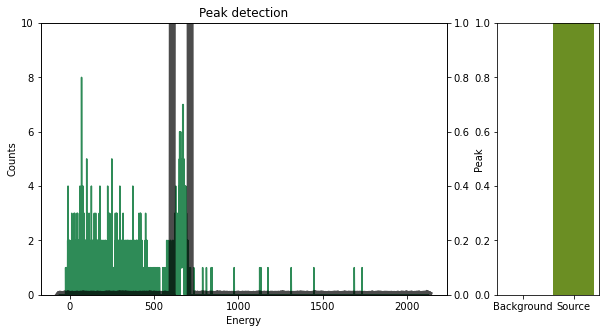

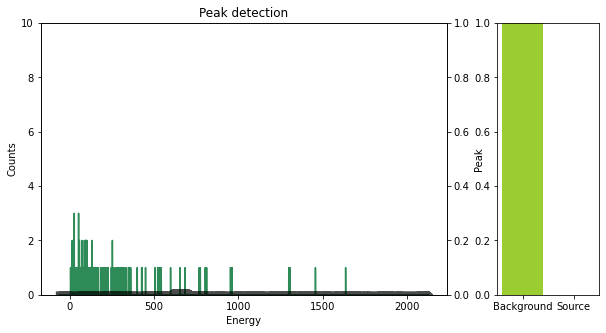

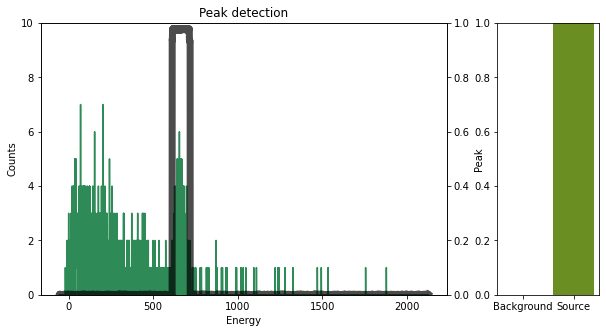

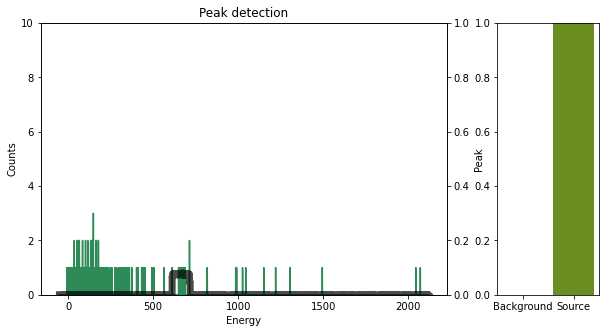

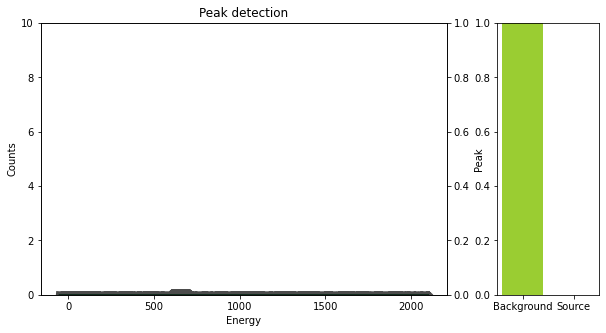

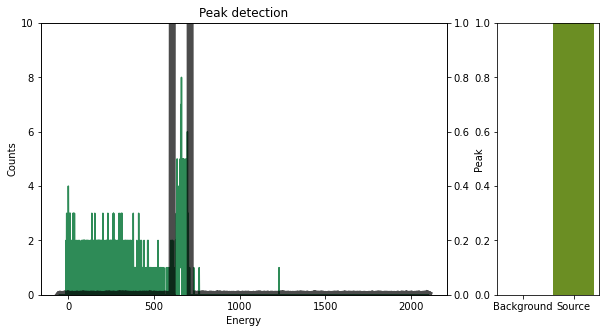

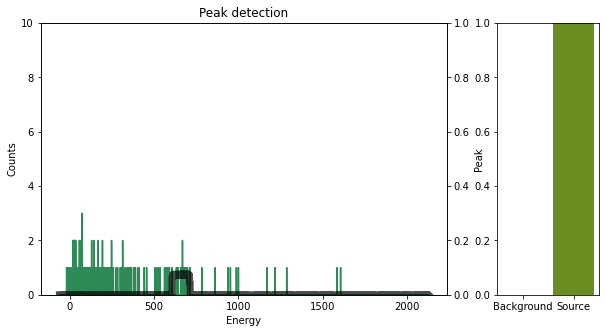

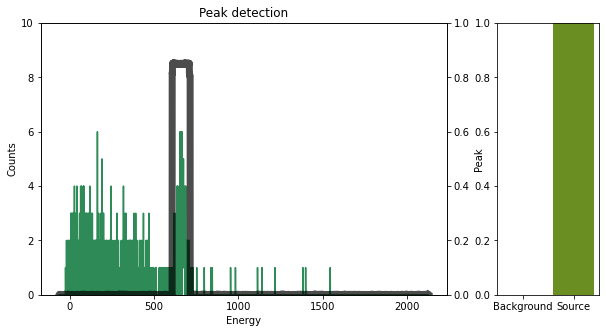

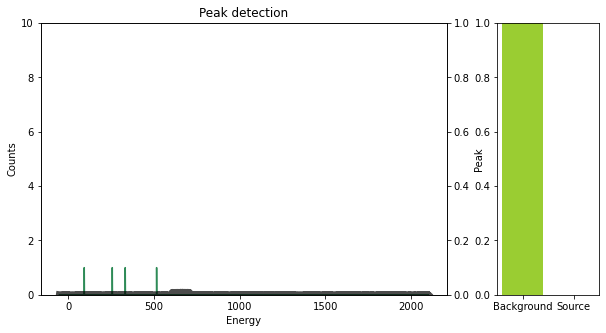

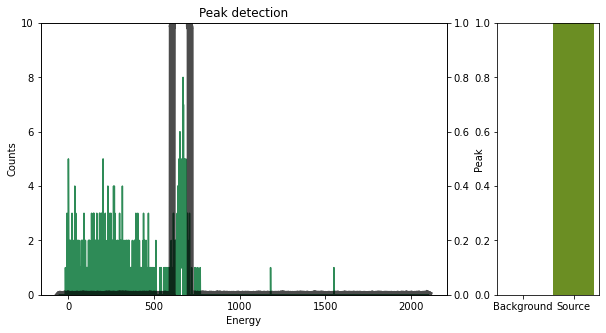

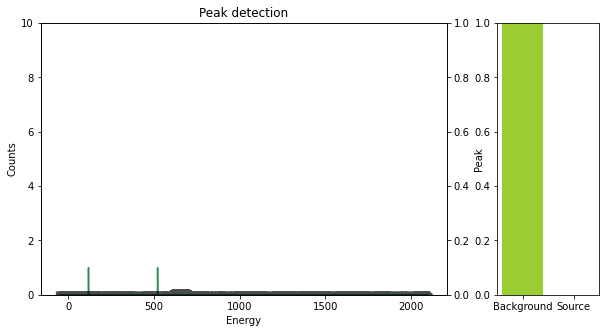

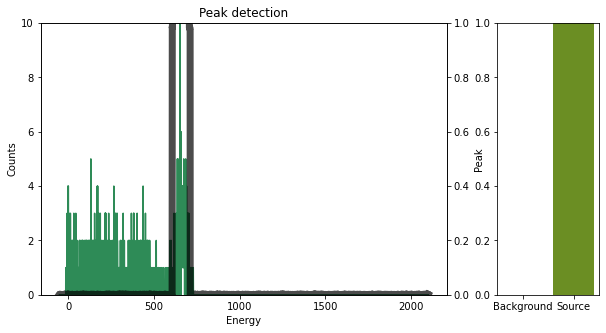

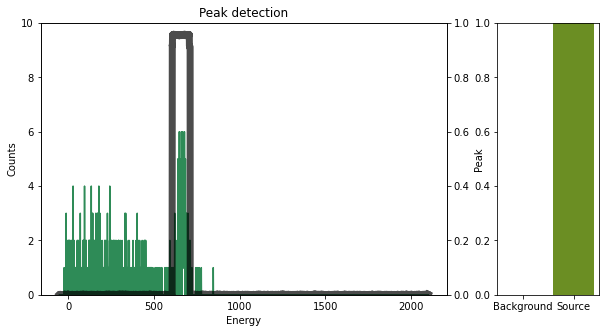

In [18]:
#plot output of the peak detection on the test split
prediction, peakLocations = model1.predict(x_test)
peakLocations = (pd.DataFrame(peakLocations))
a = pd.DataFrame(prediction)
print(a)
spect = (pd.DataFrame(x_test_spect))

c = spect[0]
e = spect[1]

b = y_test.numpy()

b = pd.DataFrame(b)
print(b)
b = pd.DataFrame(y_test)

FOUTenergie = []
FOUTcounts = []
FOUT = []

for i in range(0, len(x_test)):
    
    if 400< i <430:
        fig,(ax,ax3) = plt.subplots(1,2,gridspec_kw={'width_ratios': [4, 1]}, figsize = (10,5))
        rand = random.randint(0,len(x_test)-1)
        ax.plot(e[rand],c[rand], color = 'seagreen')
        ax3.bar("Background", prediction[rand,0], color = 'yellowgreen')
        ax3.bar("Source", prediction[rand,1], color = 'olivedrab')
        ax3.set_ylim([0,1])
        ax.set_ylim([0,10])
        ax2 = ax.twinx()
        ax2.plot(e[rand],peakLocations.iloc[rand,:], alpha = 0.7, color = 'black',linewidth=7.0)
        ax2.set_ylim([0,1])
        ax2.set_ylabel('Peak')
        ax.set_xlabel('Energy')
        ax.set_ylabel('Counts')
        ax.set_title('Peak detection')

In [ ]:
#test quickly on the benchmarking dataset
validatie = open("validation.pkl", 'rb')
validatie = pickle.load(validatie, encoding = 'bytes')

valY = validatie.pop('Bron')

vertaling_val = pd.DataFrame({
    "0" :[],
    "1" :[]
})


for i in range(0,len(valY)):
  bron = valY[i]
  if bron == 'background':
        bron = 'Background'
  a = np.where(vocabulair == bron)
  a = int(a[0])
  if(a == 1):
    Cs = 1
    Bg = 0
  else:
    Cs = 0
    Bg = 1

  vertaling_val = vertaling_val.append({
      "0": Bg,
      "1": Cs
  }, ignore_index = True)


valY = vertaling_val


Zval = validatie.pop("Counts")
Xval= validatie.pop("Energie")


val_spectrum = pd.DataFrame()
energie = []
counts = []
n =random.randint(0,len(Xval))

for i in range(0, len(Xval)):   
  a = Xval[i]
  b = Zval[i]
  a = np.array(a)

  b = np.array(b)

  energie.append(a)
  counts.append(b)



val_spectrum['Counts'] = counts
val_spectrum['Energie']= energie
val_spectrum = val_spectrum.to_numpy()
val_spectrum = val_spectrum.tolist()

val_Peak_Y = validatie.pop('Peak')
val_Peak_Y = np.array(val_Peak_Y)
val_Peak_Y = val_Peak_Y.tolist()





x_val = val_spectrum
y_val1 = valY
y_val2 = val_Peak_Y

x_val = tf.convert_to_tensor(x_val)
y_val1 = tf.convert_to_tensor(y_val1)
y_val2 = tf.convert_to_tensor(y_val2)

resultaat = model1.evaluate((x_val),(y_val1, y_val2), batch_size = 1)

In-depth analyses of results on benchmark set

C:\Users\Tones\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Tones\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


     Afstand  Hoek  Prediction   Tijd
0        0.0   0.0         0.0  1.919
1        0.0   0.0         0.0  1.892
2        0.0   0.0         0.0  1.940
3        0.0   0.0         0.0  1.886
4        0.0   0.0         0.0  2.008
..       ...   ...         ...    ...
275      0.0   0.0         0.0  4.928
276      0.0   0.0         0.0  5.008
277      0.0   0.0         0.0  4.919
278      0.0   0.0         0.0  4.997
279      0.0   0.0         0.0  4.893

[280 rows x 4 columns]


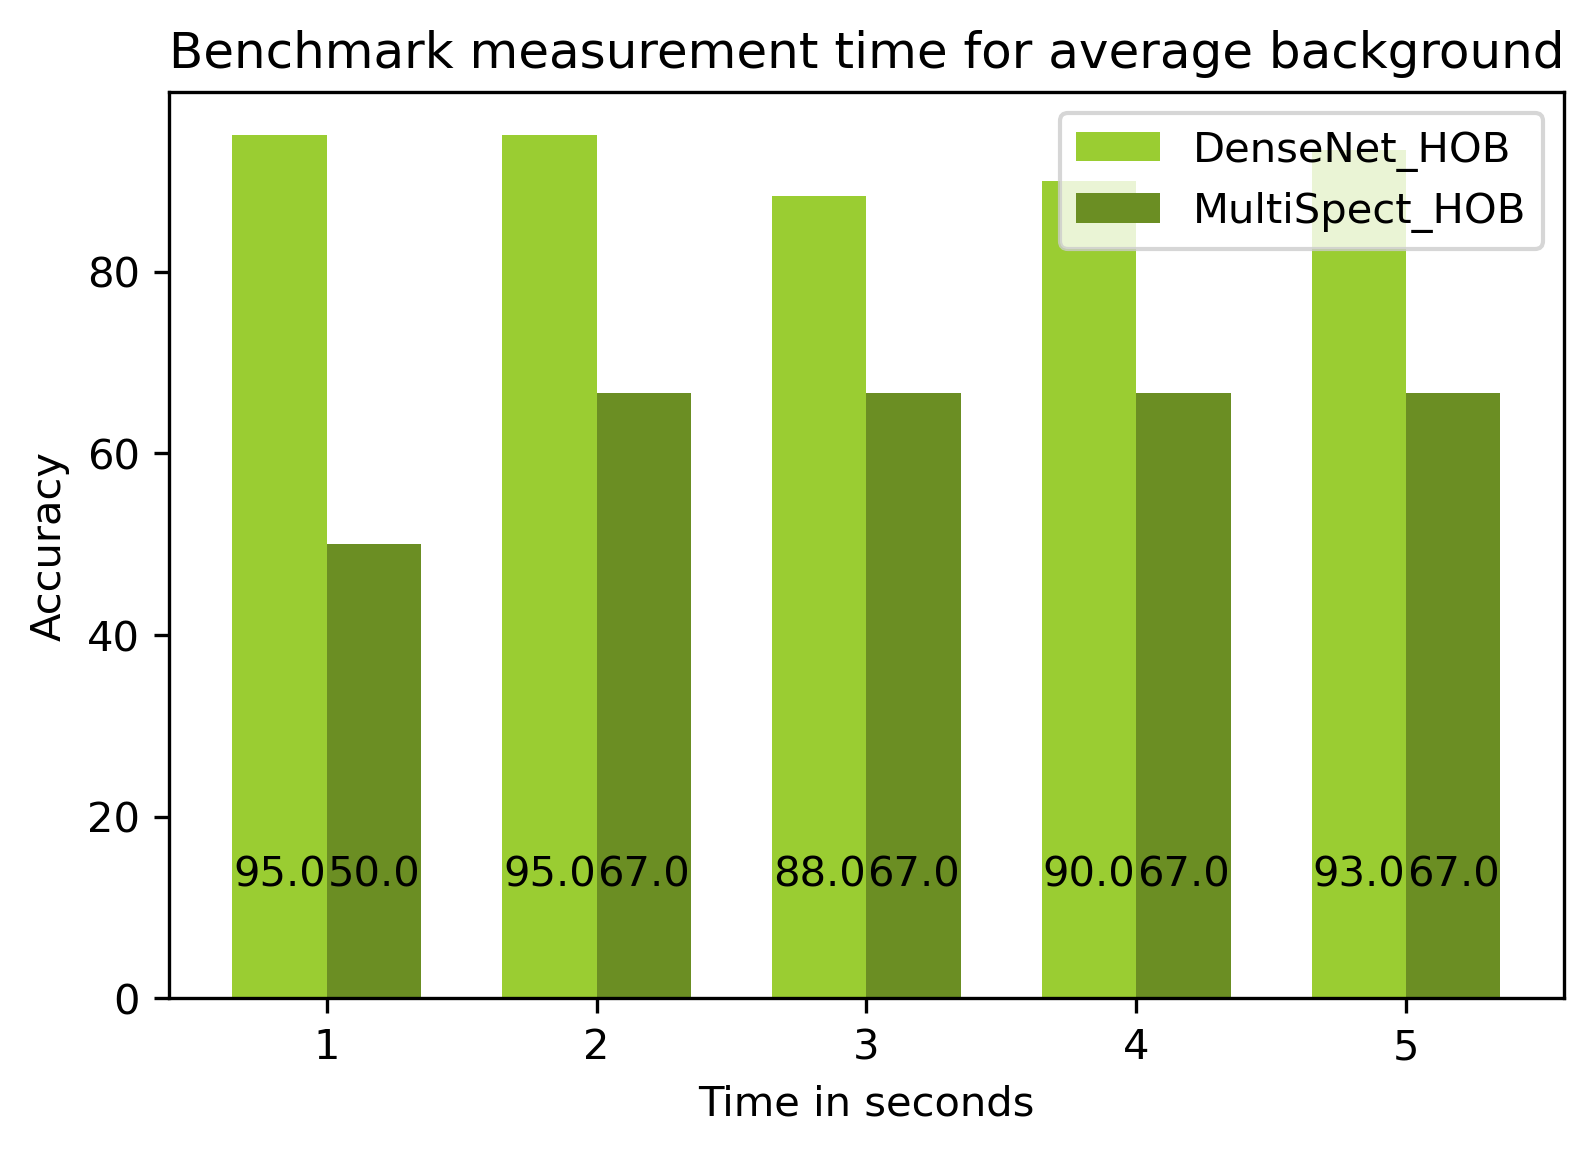

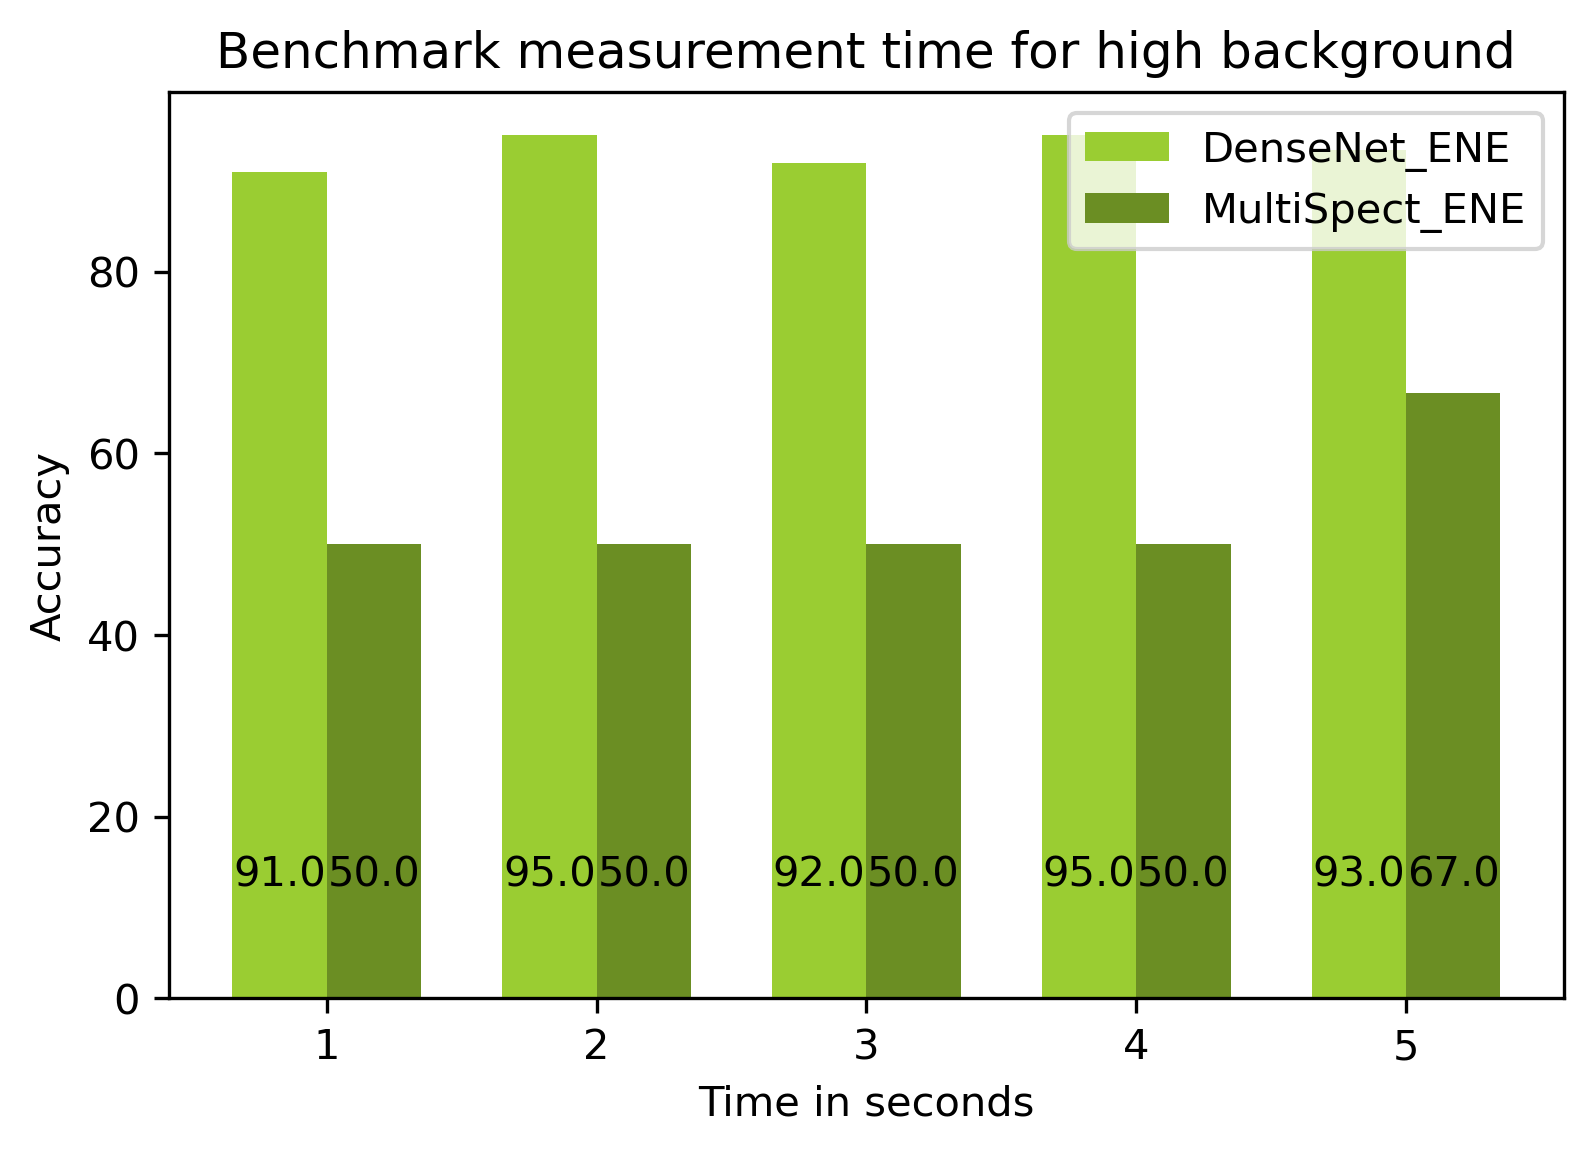

   tijd  resultaat1  resultaat2  resultaat3  resultaat4        FP1  FN1  \
4   1.0   95.000000   91.000000   50.000000   50.000000   5.000000  0.0   
0   2.0   95.000000   95.000000   66.666667   50.000000   5.000000  0.0   
1   3.0   88.333333   92.000000   66.666667   50.000000  11.666667  0.0   
2   4.0   90.000000   95.000000   66.666667   50.000000  10.000000  0.0   
3   5.0   93.333333   93.333333   66.666667   66.666667   6.666667  0.0   

        FP2  FN2  
4  4.000000  5.0  
0  5.000000  0.0  
1  8.000000  0.0  
2  5.000000  0.0  
3  6.666667  0.0  
   hoogte  resultaat1  resultaat2  resultaat3  resultaat4
1    10.0        85.0        97.0   50.000000        50.0
2    20.0        90.0        78.0   50.000000        50.0
0    30.0        90.0        56.0   66.666667        50.0
3    40.0        52.5        58.0   50.000000        50.0
4    50.0        52.5        52.0   50.000000        50.0
5    60.0        60.0        50.0   50.000000        50.0


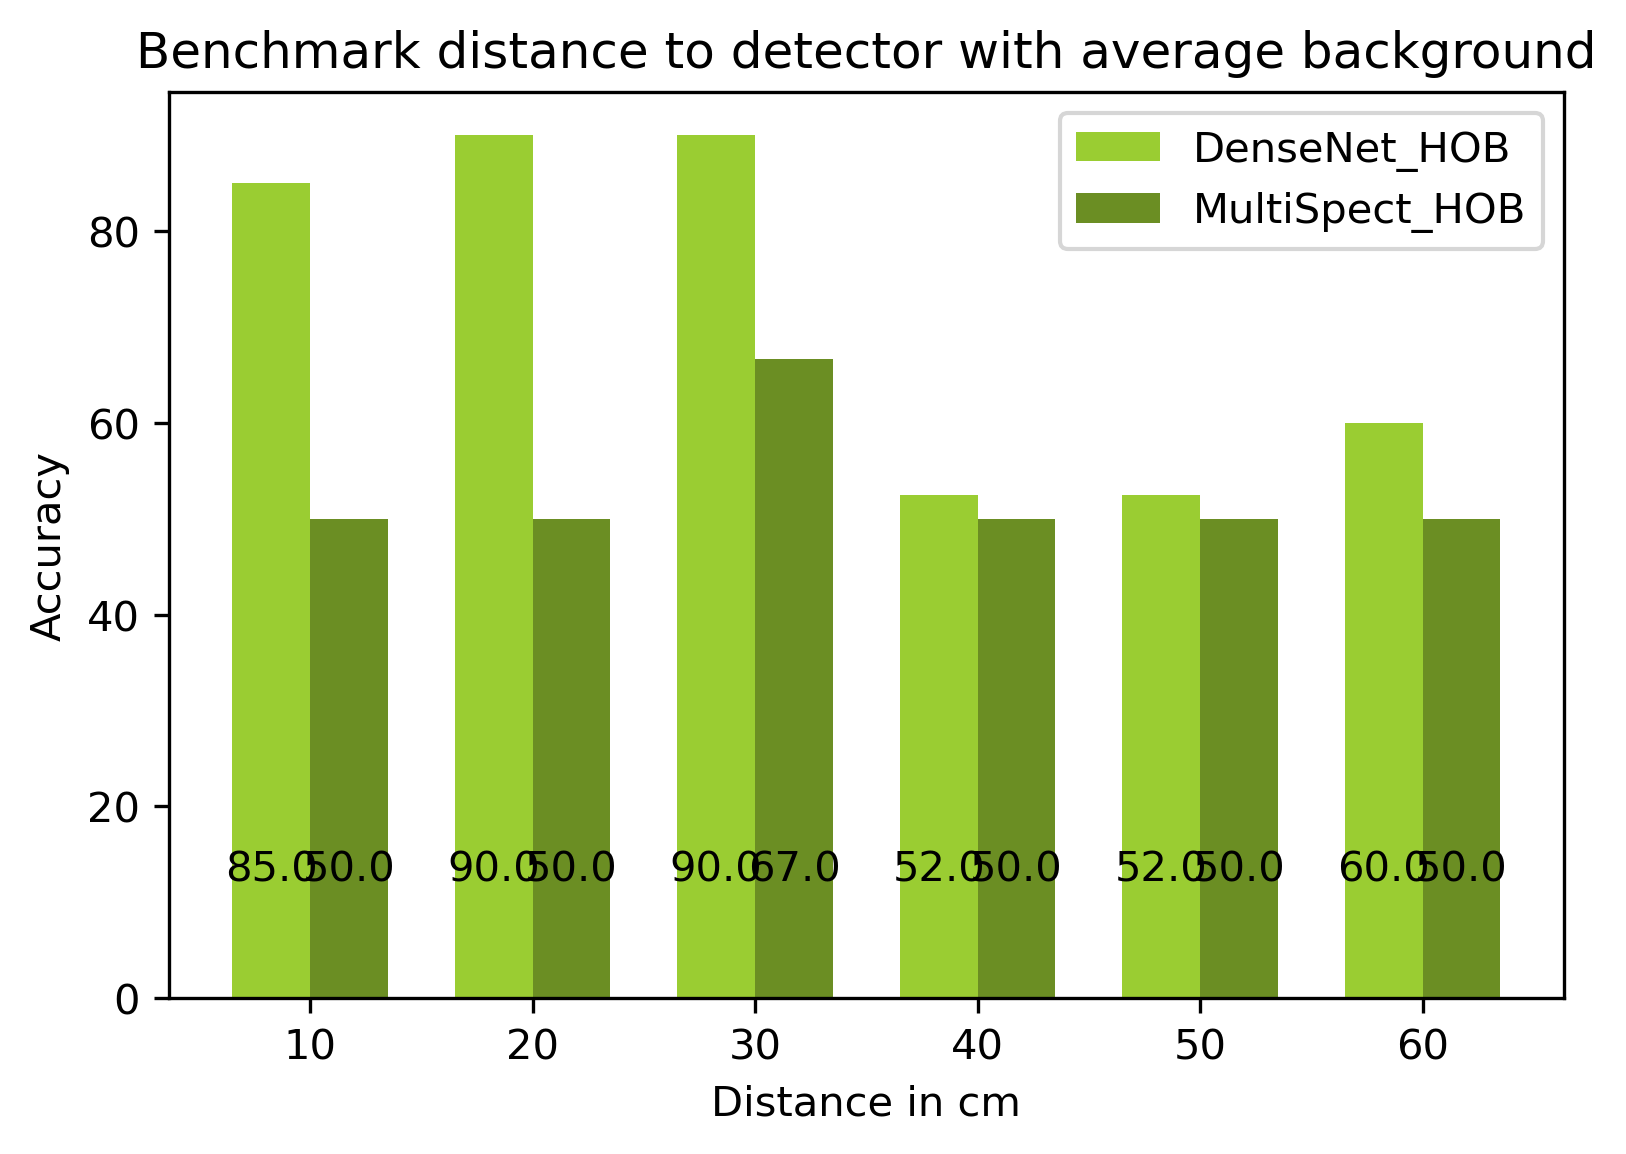

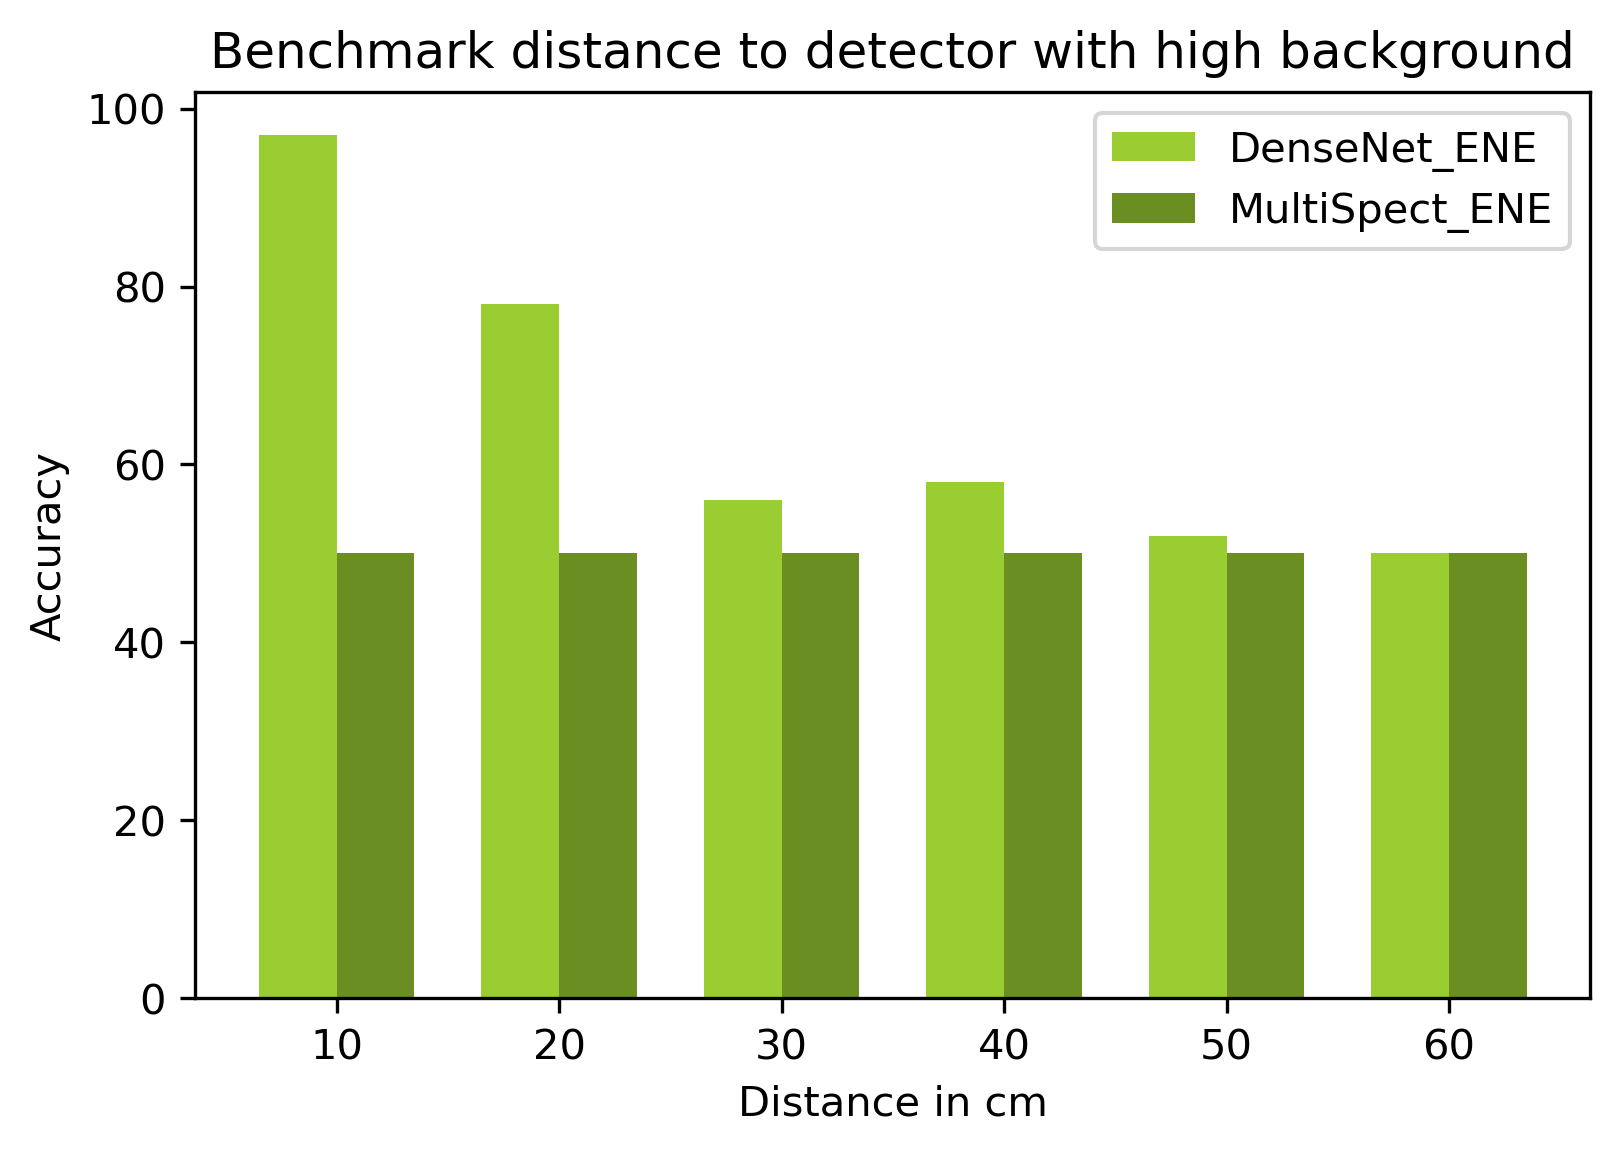

In [19]:

bench = open("Validation.pkl",'rb')
bench = pickle.load(bench,encoding='bytes')
multispec = open('MultiData_standard.pkl','rb')
multispec = pickle.load(multispec, encoding = 'bytes')


HOB_bench = pd.DataFrame()
ENE_bench = pd.DataFrame()
benchmarks = []

Multi_ENE = pd.DataFrame({'Tijd':[], 'Afstand':[], 'Hoek':[], 'Prediction':[]})
Multi_HOB = pd.DataFrame({'Tijd':[],'Afstand':[], 'Hoek':[], 'Prediction':[]})


for i in range(0,len(bench)):
    lijn = bench.iloc[i]
    multi_lijn = multispec.iloc[i]
    if(lijn['Locatie']=="HOB"):
        HOB_bench = HOB_bench.append(lijn,ignore_index = True)
        Multi_HOB = Multi_HOB.append({'Tijd': lijn['RealTime'], 'Afstand': lijn['Afstand'], 'Hoek' : lijn['Hoek'],  'Prediction': multi_lijn['Prediction']}, ignore_index = True)
        
        
    elif(lijn['Locatie']=='ENE'):
        ENE_bench = ENE_bench.append(lijn,ignore_index = True)
        Multi_ENE = Multi_ENE.append({'Tijd': lijn['RealTime'], 'Afstand': lijn['Afstand'], 'Hoek' : lijn['Hoek'],  'Prediction': multi_lijn['Prediction']}, ignore_index = True)
        

benchmarks.append(HOB_bench)
benchmarks.append(ENE_bench)

tijd_bench = pd.DataFrame()
hoogte_bench = pd.DataFrame()
hoek_bench = pd.DataFrame()

tijd2_bench = pd.DataFrame()
hoogte2_bench = pd.DataFrame()
hoek2_bench = pd.DataFrame()

tijd3_bench = pd.DataFrame()
hoogte3_bench = pd.DataFrame()
hoek3_bench = pd.DataFrame()

tijd4_bench = pd.DataFrame()
hoogte4_bench = pd.DataFrame()
hoek4_bench = pd.DataFrame()



val = bench.copy()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        height = height.round()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, 10),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                   fontsize =10)



for i in range (0, len(HOB_bench)):
    lijn = HOB_bench.iloc[i]
    multi_lijn = Multi_HOB.iloc[i]
    if(lijn['Afstand'] == 9):
        hoek_bench = hoek_bench.append(lijn, ignore_index = True)
        hoek3_bench = hoek3_bench.append(multi_lijn, ignore_index = True)
        
    elif(lijn['Hoek'] == 0 and lijn['Afstand']==0):
        
        a = lijn['RealTime'].copy()
        lijn.loc['RealTime'] = (np.round(a))
        tijd_bench = tijd_bench.append(lijn, ignore_index = True)
        tijd3_bench = tijd3_bench.append(multi_lijn, ignore_index = True)
        
    elif(lijn['Afstand']!=0 and lijn['Afstand']!=9):
        hoogte_bench = hoogte_bench.append(lijn, ignore_index = True)
        hoogte3_bench = hoogte3_bench.append(multi_lijn, ignore_index = True)

for i in range (0, len(ENE_bench)):
    lijn = ENE_bench.iloc[i]
    multi_lijn = Multi_ENE.iloc[i]
    if(lijn['Afstand'] == 9):
        hoek2_bench = hoek2_bench.append(lijn, ignore_index = True)
        hoek4_bench = hoek4_bench.append(multi_lijn, ignore_index = True)
        
    elif(lijn['Hoek'] == 0 and lijn['Afstand']==0):
        
        a = lijn['RealTime'].copy()
        lijn.loc['RealTime'] = (np.round(a))
        tijd2_bench = tijd2_bench.append(lijn, ignore_index = True)
        tijd4_bench = tijd4_bench.append(multi_lijn, ignore_index = True)
        
        
    elif(lijn['Afstand']!=0 and lijn['Afstand']!=9):
        hoogte2_bench = hoogte2_bench.append(lijn, ignore_index = True)
        hoogte4_bench = hoogte4_bench.append(multi_lijn, ignore_index = True)
        

#Tijdbenchmark

## Bewerken van de inputdata om voorspellingen te kunnen doen
## Deze data is voor de metingen van HOB

tijd_bench_spectrum = pd.DataFrame()
tijd_bench_energie = []
tijd_bench_counts = []


tijd_bench_Y= tijd_bench.pop("Bron")
tijd_vertaling = pd.DataFrame({"0":[],
                                 "1":[]})
for i in range(0,len(tijd_bench_Y)):
    Voc = tijd_bench_Y[i]
    if(Voc == 'background'):
        Voc = 'Background'
    
    a = np.where(vocabulair == Voc)
    a = int(a[0])
    if(a == 1):
        Cs = 1
        Bg = 0
    else:
        Cs = 0
        Bg = 1
    tijd_vertaling = tijd_vertaling.append({
          "0": Bg,
          "1": Cs}, ignore_index = True)


tijd_vertaling = np.array(tijd_vertaling)
tijd_bench_X = tijd_bench.pop('Counts')
tijd_bench_Z=tijd_bench.pop('Energie')
for i in range(0, len(tijd_bench)):
  


  a = np.array(tijd_bench_Z[i])
  b = np.array(tijd_bench_X[i])
 

  tijd_bench_energie.append(a)
  tijd_bench_counts.append(b)
 
tijd_bench_spectrum['Counts'] = tijd_bench_counts
tijd_bench_spectrum['Energie']= tijd_bench_energie




tijd_bench_spectrum = tf.convert_to_tensor((tijd_bench_spectrum.to_numpy()).tolist())
predictionT, peakT = model1.predict(tijd_bench_spectrum)
tijd_voorspellingen1 = np.round(predictionT)






## Deze data is voor de metingen van ENE

tijd2_bench_spectrum = pd.DataFrame()
tijd2_bench_energie = []
tijd2_bench_counts = []


tijd2_bench_Y= tijd2_bench.pop("Bron")
tijd2_vertaling = pd.DataFrame({"0":[],
                                 "1":[]})
for i in range(0,len(tijd2_bench_Y)):
    Voc = tijd2_bench_Y[i]
    if(Voc == 'background'):
        Voc = 'Background'
    
    a = np.where(vocabulair == Voc)
    a = int(a[0])
    if(a == 1):
        Cs = 1
        Bg = 0
    else:
        Cs = 0
        Bg = 1
    tijd2_vertaling = tijd2_vertaling.append({
          "0": Bg,
          "1": Cs}, ignore_index = True)


tijd2_vertaling = np.array(tijd2_vertaling)
tijd2_bench_X = tijd2_bench.pop('Counts')
tijd2_bench_Z=tijd2_bench.pop('Energie')
for i in range(0, len(tijd2_bench)):
  


  a = np.array(tijd2_bench_Z[i])
  b = np.array(tijd2_bench_X[i])
 

  tijd2_bench_energie.append(a)
  tijd2_bench_counts.append(b)
 
tijd2_bench_spectrum['Counts'] = tijd2_bench_counts
tijd2_bench_spectrum['Energie']= tijd2_bench_energie




tijd2_bench_spectrum = tf.convert_to_tensor((tijd2_bench_spectrum.to_numpy()).tolist())
predictionT2, peakT2 = model1.predict(tijd2_bench_spectrum)
tijd_voorspellingen2 = np.round(predictionT2)


#Vanaf hier werken om de twee te quantificeren
tijd_correct1 = []
tijd_fout1 = []
tijd_correct2 = []
tijd_fout2 = []

tijd_correct3 = []
tijd_fout3 = []
tijd_correct4 = []
tijd_fout4 = []


FP1 = []
FP2 = []
FN1 = []
FN2 = []

print(tijd3_bench)

for i in range(0, len(tijd_bench)):
    if(tijd_voorspellingen1[i,0] ==tijd_vertaling[i,0]):
        tijd_correct1.append(tijd_bench['RealTime'].iloc[i])
    else:
        tijd_fout1.append(tijd_bench['RealTime'].iloc[i])
        if(tijd_voorspellingen1[i,0] == 0):
            FP1.append(tijd_bench['RealTime'].iloc[i])
        else:
            FN1.append(tijd_bench['RealTime'].iloc[i])
    
    
    if(int(tijd3_bench['Prediction'].iloc[i]) == tijd_vertaling[i,1]):
        tijd_correct3.append(np.round(tijd3_bench['Tijd'].iloc[i]))
        
    else:
        tijd_fout3.append(np.round(tijd3_bench['Tijd'].iloc[i]))
        

        
        
for i in range(0,len(tijd2_bench)):
    
    if(tijd_voorspellingen2[i,0] ==tijd2_vertaling[i,0]):
        tijd_correct2.append(tijd2_bench['RealTime'].iloc[i])
    else:
        tijd_fout2.append(tijd2_bench['RealTime'].iloc[i])
        if(tijd_voorspellingen2[i,0] == 0):
            FP2.append(tijd2_bench['RealTime'].iloc[i])
        else:
            FN2.append(tijd2_bench['RealTime'].iloc[i])
    
    if(int(tijd4_bench['Prediction'].iloc[i]) == tijd2_vertaling[i,1]):
        tijd_correct4.append(np.round(tijd4_bench['Tijd'].iloc[i]))
    else:
        tijd_fout4.append(np.round(tijd4_bench['Tijd'].iloc[i]))

unique_tijd = tijd_bench['RealTime'].unique()
tijd_resultaat = pd.DataFrame({'tijd' : [],
                               'resultaat1' : [],
                               'resultaat2' :[],
                               'resultaat3':[],
                               'resultaat4':[],
                               'FP1':[],
                               'FN1':[],
                               'FP2':[],
                               'FN2':[]})


for tijd in unique_tijd:
    correct1 = 0
    fout1 = 0
    FalseP1 = 0
    FalseN1 = 0
    
    
    
    correct1 = tijd_correct1.count(tijd)
    fout1 = tijd_fout1.count(tijd)
    
    if not FP1:
        FalseP1 = 0
    else:
        FalseP1 = FP1.count(tijd)
    
    if not FN1:
        FalseN1 = 0
    else:
        FalseN1 = FN1.count(tijd)
    
    correct2 = 0
    fout2 = 0
    
    correct2 = tijd_correct2.count(tijd)
    fout2 = tijd_fout2.count(tijd)
    
    
    
    correct3 = 0
    fout3 = 0
    
    correct3 = tijd_correct3.count(tijd)
    fout3 = tijd_fout3.count(tijd)    
    
    correct4 = 0
    fout4 = 0
    
    correct4 = tijd_correct4.count(tijd)
    fout4 = tijd_fout4.count(tijd)    
     
    if not FP2:
        FalseP2 = 0
    else:
        FalseP2 = FP2.count(tijd)
    
    if not FN2:
        FalseN2 = 0
    else:
        FalseN2 = FN2.count(tijd)
        
    percentage1 = (correct1)/(correct1 + fout1) * 100
    percentage2 = (correct2)/(correct2 + fout2) * 100
    percentage3 = (correct3)/(correct3 + fout3) * 100
    percentage4 = (correct4)/(correct4 + fout4) * 100

    False_Negative1 = (FalseN1/(fout1+correct1))*100
    False_Negative2 = (FalseN2/(fout2+correct2)) * 100
    
    False_Positive1 = (FalseP1/(fout1+ correct1)) * 100
    False_Positive2 = (FalseP2/(fout2+correct2)) * 100
    
    
    tijd_resultaat = tijd_resultaat.append({
        'tijd': tijd,
        'resultaat1' : percentage1,
        'resultaat2': percentage2,
        'resultaat3':percentage3,
        'resultaat4':percentage4,
        'FP1': False_Positive1,
        'FN1' : False_Negative1,
        'FP2': False_Positive2,
        'FN2': False_Negative2
        }, ignore_index = True)

tijd_resultaat = tijd_resultaat.sort_values(by=['tijd'])



fig,(ax) = plt.subplots(dpi = 300)
mod1 = ax.bar(tijd_resultaat['tijd']-0.175, tijd_resultaat['resultaat1'], width =0.35, label = 'DenseNet_HOB', color = 'yellowgreen' )
mod3 = ax.bar(tijd_resultaat['tijd']+0.175, tijd_resultaat['resultaat3'], width =0.35, label = 'MultiSpect_HOB', color = 'olivedrab' )
autolabel(mod1)
autolabel(mod3)
ax.set_xlabel('Time in seconds')
ax.set_ylabel('Accuracy')
ax.legend()
ax.set_title('Benchmark measurement time for average background')
plt.show()


fig,(ax) = plt.subplots(dpi = 300)
mod2 = ax.bar(tijd_resultaat['tijd']-0.175, tijd_resultaat['resultaat2'], width =0.35, label = 'DenseNet_ENE', color = 'yellowgreen' )
mod4 = ax.bar(tijd_resultaat['tijd']+0.175, tijd_resultaat['resultaat4'], width =0.35, label = 'MultiSpect_ENE', color = 'olivedrab' )
autolabel(mod4)
autolabel(mod2)
ax.set_xlabel('Time in seconds')
ax.set_ylabel('Accuracy')
ax.legend()
ax.set_title('Benchmark measurement time for high background')
plt.show()


print(tijd_resultaat)

###############################################
##############################################

############################################
###########################################
#hoogtenebenchmark
hoogte_bench_spectrum = pd.DataFrame()
hoogte_bench_energie = []
hoogte_bench_counts = []
    

hoogte_bench_Y= hoogte_bench.pop("Bron")
hoogte_vertaling = pd.DataFrame({"0":[],
                                 "1":[]})
for i in range(0,len(hoogte_bench_Y)):
    Voc = hoogte_bench_Y[i]
    if(Voc == 'background'):
        Voc = 'Background'
    
    a = np.where(vocabulair == Voc)
    a = int(a[0])
    if(a == 1):
        Cs = 1
        Bg = 0
    else:
        Cs = 0
        Bg = 1
    hoogte_vertaling = hoogte_vertaling.append({
          "0": Bg,
          "1": Cs}, ignore_index = True)


hoogte_vertaling = np.array(hoogte_vertaling)
hoogte_bench_X = hoogte_bench.pop('Counts')
hoogte_bench_Z=hoogte_bench.pop('Energie')
for i in range(0, len(hoogte_bench)):

  a = np.array(hoogte_bench_Z[i])
  b = np.array(hoogte_bench_X[i])

  hoogte_bench_energie.append(a)
  hoogte_bench_counts.append(b)
 
hoogte_bench_spectrum['Counts'] = hoogte_bench_counts
hoogte_bench_spectrum['Energie']= hoogte_bench_energie
hoogte_bench_spectrum = tf.convert_to_tensor((hoogte_bench_spectrum.to_numpy()).tolist())

predictionH, peakH = model1.predict(hoogte_bench_spectrum)
hoogte_voorspellingen1 = np.round(predictionH)

#ENE

hoogte_bench_spectrum2 = pd.DataFrame()
hoogte_bench_energie2 = []
hoogte_bench_counts2 = []
    

hoogte_bench_Y2= hoogte2_bench.pop("Bron")
hoogte_vertaling2 = pd.DataFrame({"0":[],"1":[]})
for i in range(0,len(hoogte_bench_Y2)):
    Voc = hoogte_bench_Y2[i]
    if(Voc == 'background'):
        Voc = 'Background'
    
    a = np.where(vocabulair == Voc)
    a = int(a[0])
    if(a == 1):
        Cs = 1
        Bg = 0
    else:
        Cs = 0
        Bg = 1
    hoogte_vertaling2 = hoogte_vertaling2.append({ "0": Bg, "1": Cs}, ignore_index = True)


hoogte_vertaling2 = np.array(hoogte_vertaling2)
hoogte_bench_X2 = hoogte2_bench.pop('Counts')
hoogte_bench_Z2=hoogte2_bench.pop('Energie')
for i in range(0, len(hoogte2_bench)):
    
  a = np.array(hoogte_bench_Z2[i])
  b = np.array(hoogte_bench_X2[i])
 
  hoogte_bench_energie2.append(a)
  hoogte_bench_counts2.append(b)
 
hoogte_bench_spectrum2['Counts'] = hoogte_bench_counts2
hoogte_bench_spectrum2['Energie']= hoogte_bench_energie2
hoogte_bench_spectrum2 = tf.convert_to_tensor((hoogte_bench_spectrum2.to_numpy()).tolist())

predictionH2, peakH2 = model1.predict(hoogte_bench_spectrum2)
hoogte_voorspellingen2 = np.round(predictionH2)

hoogte_correct1 = []
hoogte_fout1 = []

hoogte_correct2 = []
hoogte_fout2 = []

hoogte_correct3 = []
hoogte_fout3 = []

hoogte_correct4 = []
hoogte_fout4 = []



for i in range(0, len(hoogte_bench)):
    if(hoogte_voorspellingen1[i,0] ==hoogte_vertaling[i,0]):
        hoogte_correct1.append(hoogte_bench['Afstand'].iloc[i])
    else:
        hoogte_fout1.append(hoogte_bench['Afstand'].iloc[i])  
    if(int(hoogte3_bench['Prediction'].iloc[i]) == hoogte_vertaling[i,1]):
        hoogte_correct3.append(hoogte3_bench['Afstand'].iloc[i])
    else:
        hoogte_fout3.append(hoogte3_bench['Afstand'].iloc[i])
        
for i in range(0, len(hoogte2_bench)):
    if(hoogte_voorspellingen2[i,0] ==hoogte_vertaling2[i,0]):
        hoogte_correct2.append(hoogte2_bench['Afstand'].iloc[i])
    else:
        hoogte_fout2.append(hoogte2_bench['Afstand'].iloc[i])
    
    if(int(hoogte4_bench['Prediction'].iloc[i]) == hoogte_vertaling2[i,1]):
        hoogte_correct4.append(hoogte4_bench['Afstand'].iloc[i])
    else:
        hoogte_fout4.append(hoogte4_bench['Afstand'].iloc[i])
    
        
unique_hoogte = hoogte_bench['Afstand'].unique()
hoogte_resultaat = pd.DataFrame({'hoogte' : [], 'resultaat1' : [], 'resultaat2':[], 'resultaat3':[], 'resultaat4':[]})

for hoogte in unique_hoogte:
    correct1 = 0
    correct2 =0
    correct3 = 0
    correct4 = 0
    fout1 = 0
    fout2 = 0
    fout3 = 0
    fout4 = 0
    
    
    
    correct1 = hoogte_correct1.count(hoogte)
    fout1 = hoogte_fout1.count(hoogte)    
    percentage1 = (correct1)/(correct1 + fout1) * 100
 
    correct2 = hoogte_correct2.count(hoogte)
    fout2 = hoogte_fout2.count(hoogte)
    percentage2 = (correct2)/(correct2 + fout2) * 100
    
    correct3 = hoogte_correct3.count(hoogte)
    fout3 = hoogte_fout3.count(hoogte)
    percentage3 = (correct3)/(correct3 + fout3) * 100
    
    correct4 = hoogte_correct4.count(hoogte)
    fout4 = hoogte_fout4.count(hoogte)
    percentage4 = (correct4)/(correct4 + fout4) * 100
    
    
    
    hoogte_resultaat = hoogte_resultaat.append({
        'hoogte': hoogte,
        'resultaat1' : percentage1
        ,'resultaat2' : percentage2
        ,'resultaat3' : percentage3
        ,'resultaat4' : percentage4
        
        }, ignore_index = True)

hoogte_resultaat = hoogte_resultaat.sort_values(by=['hoogte'])


print(hoogte_resultaat)

fig,ax = plt.subplots(dpi = 300)
mod1 = ax.bar(hoogte_resultaat['hoogte']-1.75,hoogte_resultaat['resultaat1'] ,width = 3.5,label = 'DenseNet_HOB', color = 'yellowgreen')
mod3 = ax.bar(hoogte_resultaat['hoogte']+1.75,hoogte_resultaat['resultaat3'] ,width = 3.5,label = 'MultiSpect_HOB', color = 'olivedrab')
autolabel(mod1)
autolabel(mod3)
plt.xlabel('Distance in cm')
plt.ylabel('Accuracy')
ax.legend()
plt.title('Benchmark distance to detector with average background')
plt.show()


fig,ax = plt.subplots(dpi = 300)
mod2 = ax.bar(hoogte_resultaat['hoogte']-1.75,hoogte_resultaat['resultaat2'], width =3.5,label = 'DenseNet_ENE', color = 'yellowgreen' )
mod4 = ax.bar(hoogte_resultaat['hoogte']+1.75,hoogte_resultaat['resultaat4'], width =3.5,label = 'MultiSpect_ENE', color = 'olivedrab' )
#autolabel(mod2)
#autolabel(mod4)
plt.xlabel('Distance in cm')
plt.ylabel('Accuracy')
ax.legend()
plt.title('Benchmark distance to detector with high background')
plt.show()